<a href="https://colab.research.google.com/github/sofiapautova29-maker/dap-2024/blob/main/les05/les05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №5. Визуализация данных**

**Задача 1.**
Постройте два линейных графика функции y = 2/x + 3 на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

*   Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
*   Первый график должен быть красного цвета и нарисован штрихпунктирной линией
*   Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линие

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


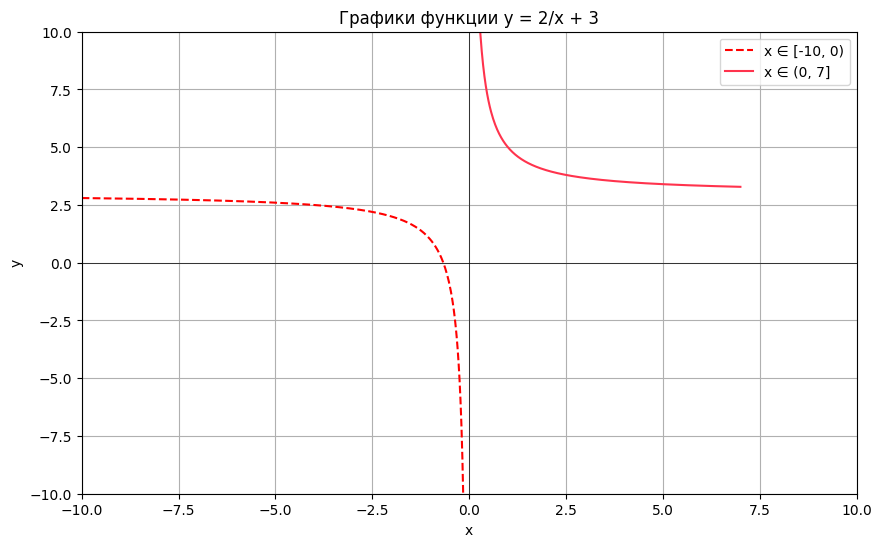

In [2]:
def y_func(x):
    return 2 / x + 3

x1 = np.linspace(-10, -0.1, 400)
x2 = np.linspace(0.1, 7, 400)

y1 = y_func(x1)
y2 = y_func(x2)

plt.figure(figsize=(10, 6))

# Первый график
plt.plot(x1, y1, color='red', linestyle='--', label='x ∈ [-10, 0)')

# Второй график
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label='x ∈ (0, 7]')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функции y = 2/x + 3')
plt.legend()

plt.grid(True)
plt.show()

**Задача 2.**
Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

*   По оси X - возврат пассажира (Age)
*   По оси Y - стоимость билета (Fare)
*   Для выживших пассажиров используется маркер зеленый круг (Survived)
*   Для не выживших пассажиров используется маркер красный крест (Survived)
*   График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

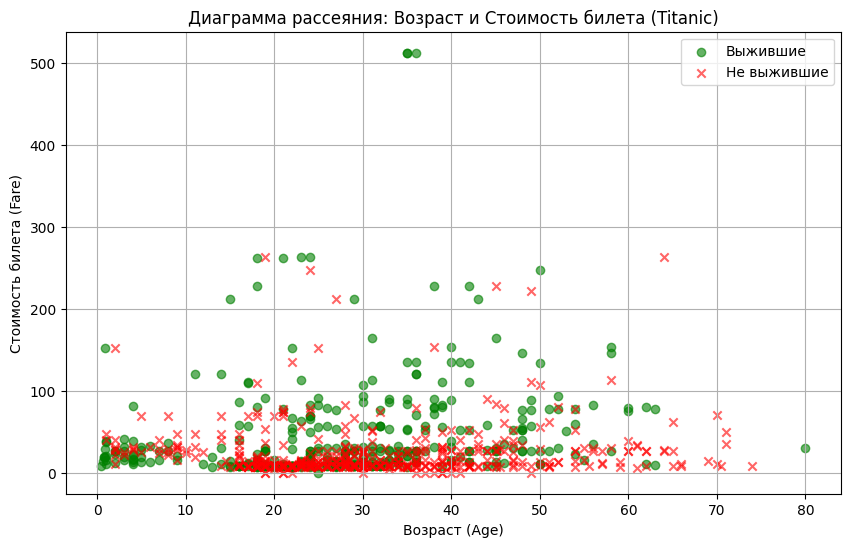

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic_data = pd.read_csv(url)

# Удаление данных с отсутствующими значениями в Age и Fare
filtered_data = titanic_data.dropna(subset=['Age', 'Fare'])

# Разделение данных по выжившим
survived = filtered_data[filtered_data['Survived'] == 1]
not_survived = filtered_data[filtered_data['Survived'] == 0]

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Fare'], c='green', label='Выжившие', marker='o', alpha=0.6)
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', label='Не выжившие', marker='x', alpha=0.6)

plt.xlabel('Возраст (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния: Возраст и Стоимость билета (Titanic)')
plt.legend()
plt.grid(True)
plt.show()


**Задание 3.**
Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')


*   Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
*   Цвет маркеров должен зависеть от вида ирисов (iris.target)
*   Графики должны иметь подписи к осям, легенду и общий заголовок





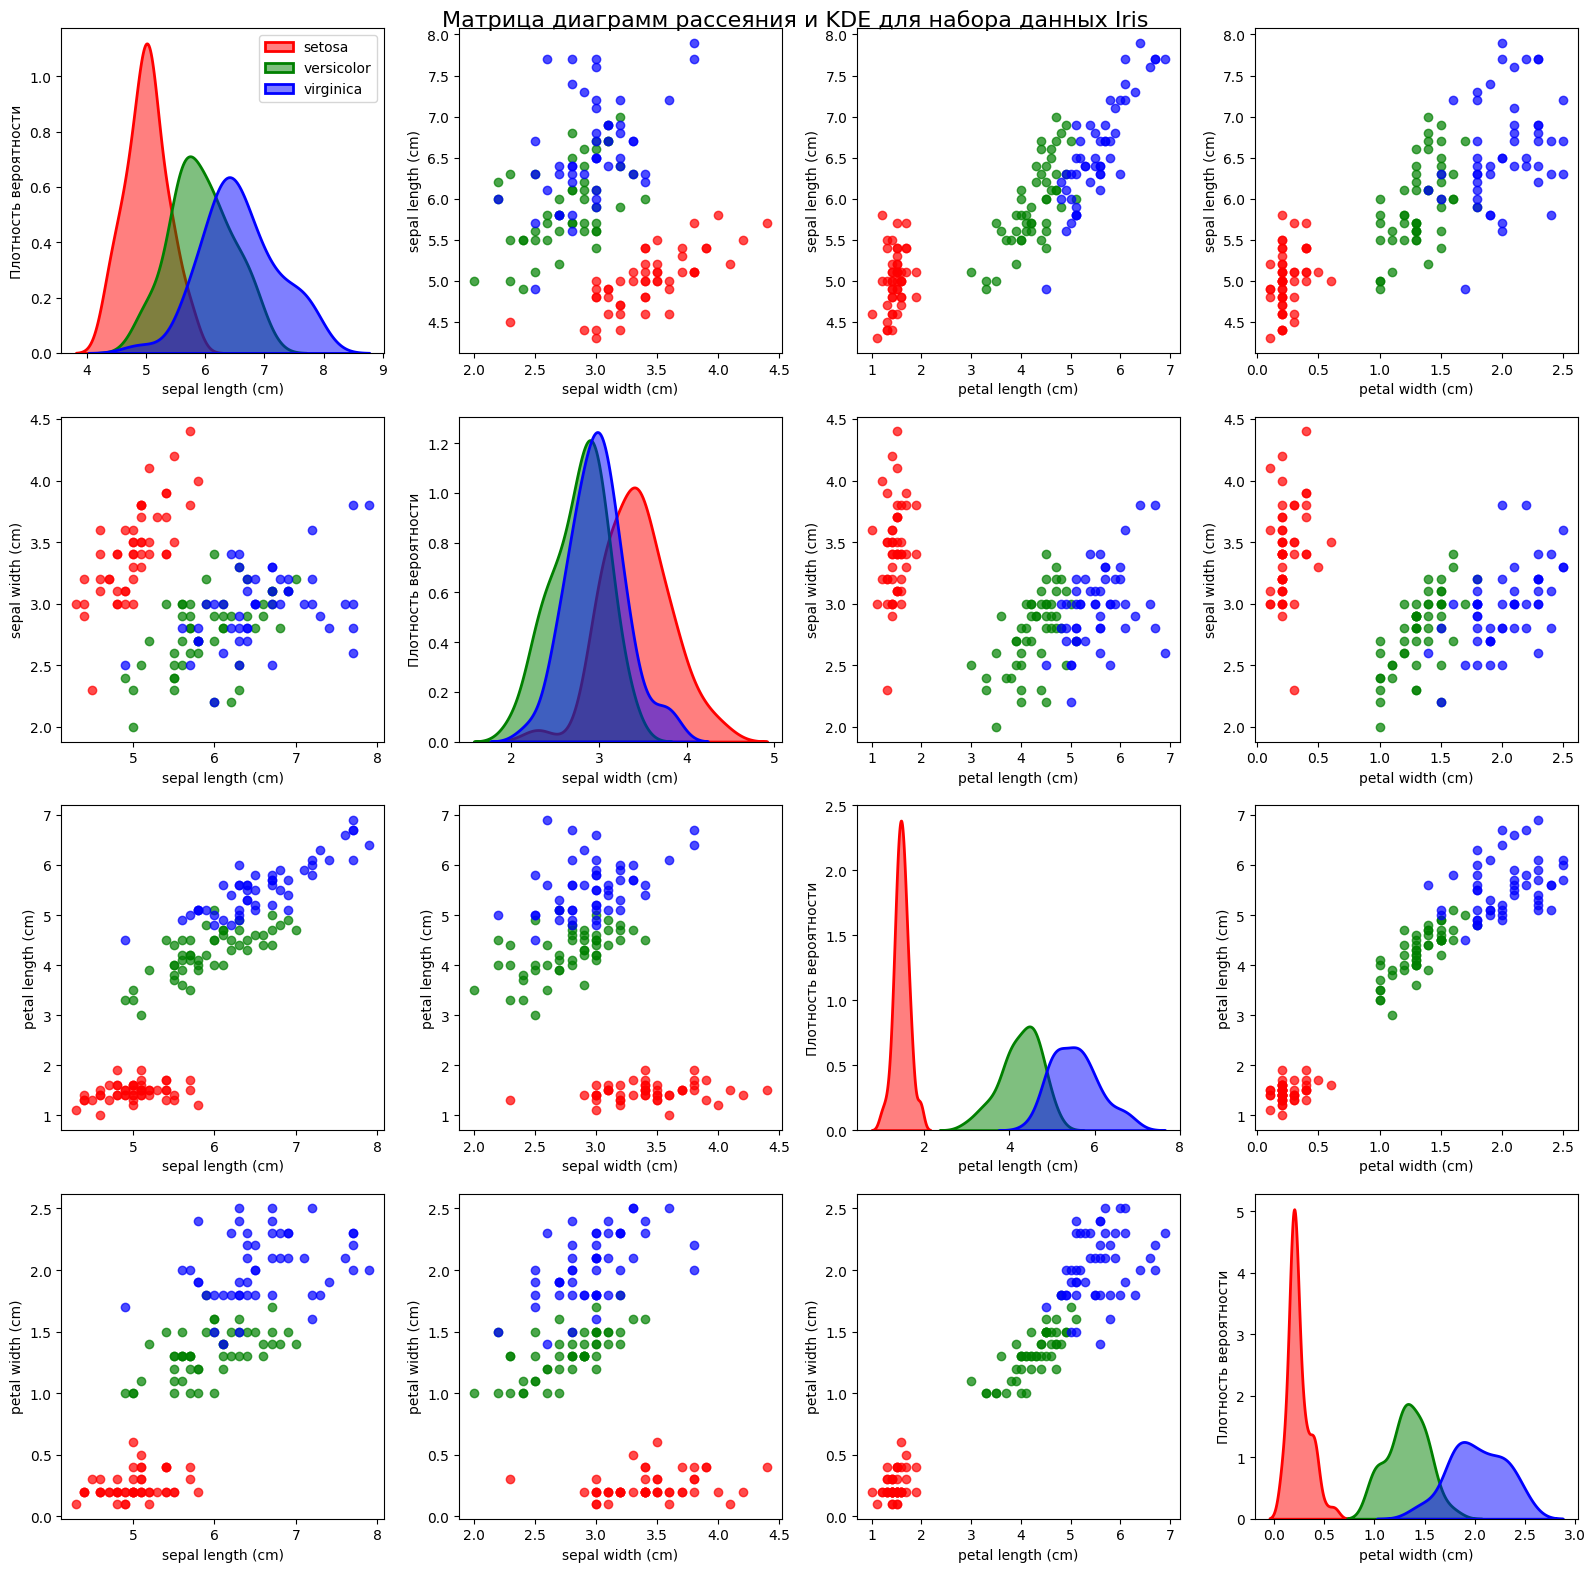

In [4]:
from sklearn.datasets import load_iris
import seaborn as sns
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle("Матрица диаграмм рассеяния и KDE для набора данных Iris", fontsize=16)

colors = ["red", "green", "blue"]

for i in range(4):
    for j in range(4):
        if i == j:

            for target in range(3):
                sns.kdeplot(X[y == target, i], ax=axes[i, j],
                           color=colors[target], label=target_names[target],
                           fill=True, alpha=0.5, linewidth=2)
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel("Плотность вероятности")
        else:

            for target in range(3):
                axes[i, j].scatter(X[y == target, j], X[y == target, i],
                                  c=colors[target], alpha=0.7, label=target_names[target])
            axes[i, j].set_xlabel(feature_names[j])
            axes[i, j].set_ylabel(feature_names[i])
        if i == 0 and j == 0:
            axes[i, j].legend()

plt.tight_layout()
plt.show()

**Задание 4.**
Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

*   Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
*   Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
*   График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

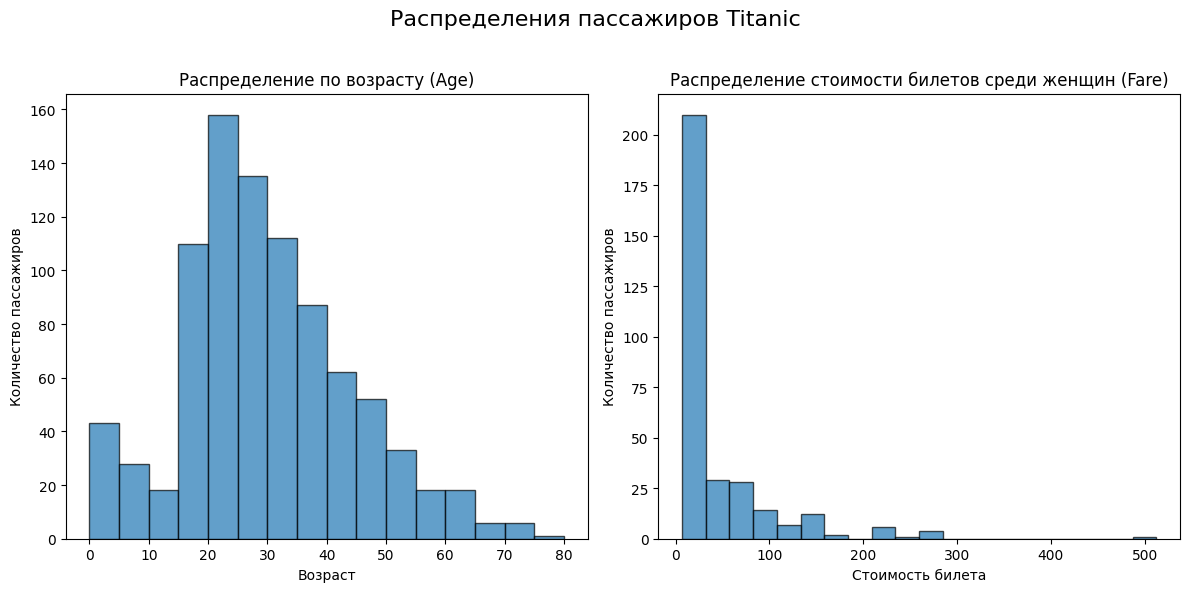

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic_data = pd.read_csv(url)

# Удаляем строки с пропущенными значениями в столбцах 'Age' и 'Fare'
titanic_data = titanic_data.dropna(subset=['Age', 'Fare'])

# Построение графиков на одном холсте
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 1. Гистограмма распределения пассажиров по возрасту (Age), интервал 5 лет
axes[0].hist(titanic_data['Age'], bins=range(0, 85, 5), edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение по возрасту (Age)')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество пассажиров')

# 2. Гистограмма распределения пассажиров женского пола по стоимости билетов (Fare)
female_passengers = titanic_data[titanic_data['Sex'] == 'female']
axes[1].hist(female_passengers['Fare'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title('Распределение стоимости билетов среди женщин (Fare)')
axes[1].set_xlabel('Стоимость билета')
axes[1].set_ylabel('Количество пассажиров')

fig.suptitle('Распределения пассажиров Titanic', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Задание 5.**
Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

*   Диаграмма должна быть вертикальной
*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - средняя стоимость за проезд для данного класса (Fare)
*   График должен иметь подписи к осям, легенду и заголовок

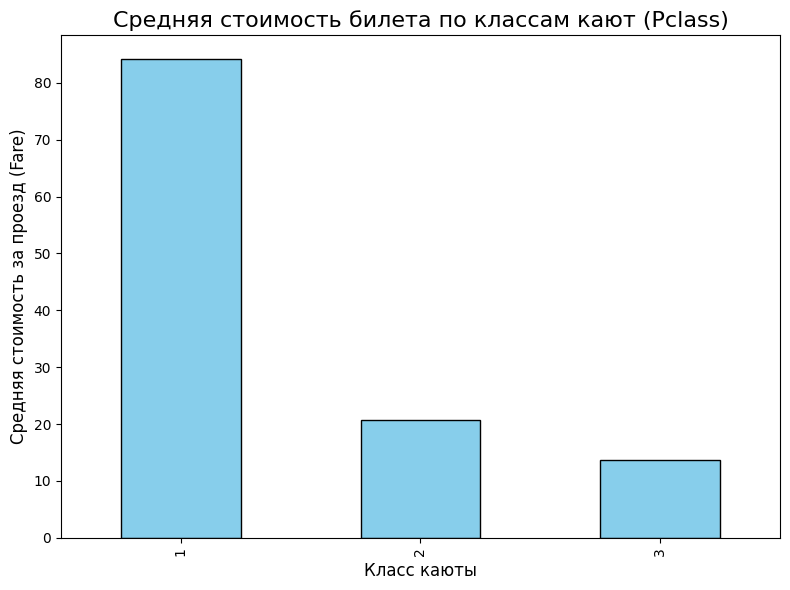

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic_data = pd.read_csv(url)

# Удаляем строки с пропущенными значениями в столбце 'Fare'
titanic_data = titanic_data.dropna(subset=['Fare'])

# Группировка данных по классу каюты (Pclass) и расчет средней стоимости билета (Fare) для каждого класса
average_fare_by_class = titanic_data.groupby('Pclass')['Fare'].mean()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
average_fare_by_class.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Средняя стоимость билета по классам кают (Pclass)', fontsize=16)
plt.xlabel('Класс каюты', fontsize=12)
plt.ylabel('Средняя стоимость за проезд (Fare)', fontsize=12)

plt.tight_layout()
plt.show()

**Задание 6.**
Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

*   Диаграмма должна быть вертикальной
*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - количество пассажиров с разбивкой по полу (Sex)
*   График должен иметь подписи к осям, легенду и заголовок

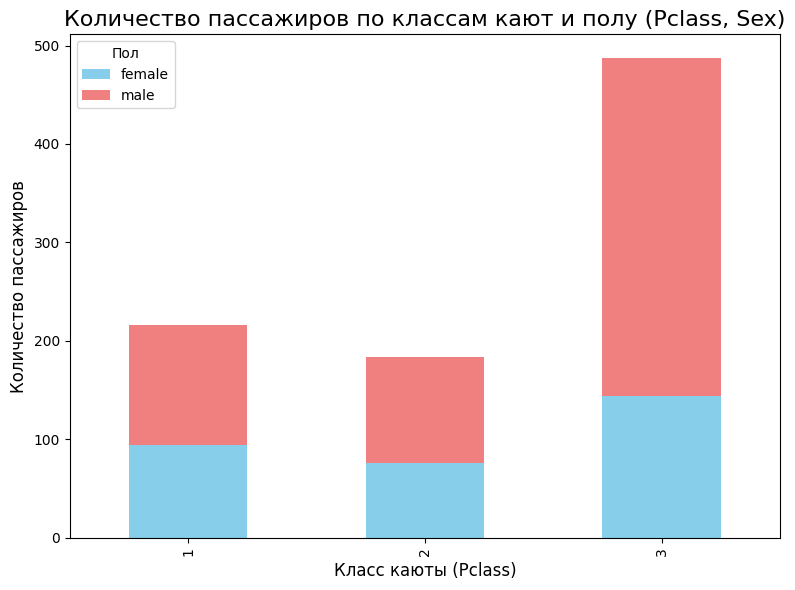

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic_data = pd.read_csv(url)

# Группировка данных по классу каюты (Pclass) и полу (Sex), подсчет количества пассажиров
gender_count_by_class = titanic_data.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

# Построение столбчатой диаграммы с накоплением
gender_count_by_class.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightcoral'])

plt.title('Количество пассажиров по классам кают и полу (Pclass, Sex)', fontsize=16)
plt.xlabel('Класс каюты (Pclass)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(title='Пол', loc='upper left')
plt.tight_layout()
plt.show()

**Задание 7.**
Для набора данных iris постройте круговую диаграмму

*   Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
*   Сектор с максимальной долей долен быть выдвинут
*   График должен иметь подписи к осям, легенду и заголовок

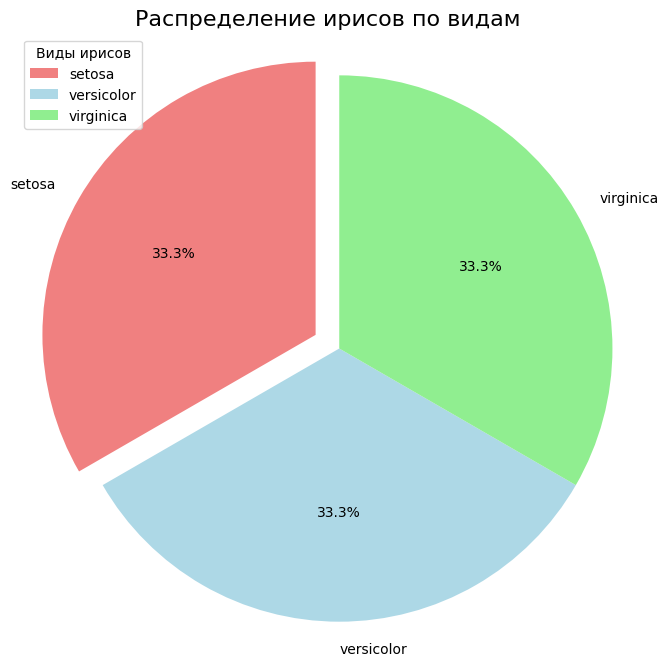

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# Создание DataFrame из данных
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
species_names = [iris.target_names[i] for i in iris_df['species']]

# Подсчет количества ирисов каждого вида
species_counts = pd.Series(species_names).value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90,
        explode=[0.1 if i == species_counts.idxmax() else 0 for i in species_counts.index],
        colors=['lightcoral', 'lightblue', 'lightgreen'])

plt.title('Распределение ирисов по видам', fontsize=16)
plt.legend(species_counts.index, title="Виды ирисов", loc="upper left")
plt.axis('equal')
plt.show()

**Задание 8.**
Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

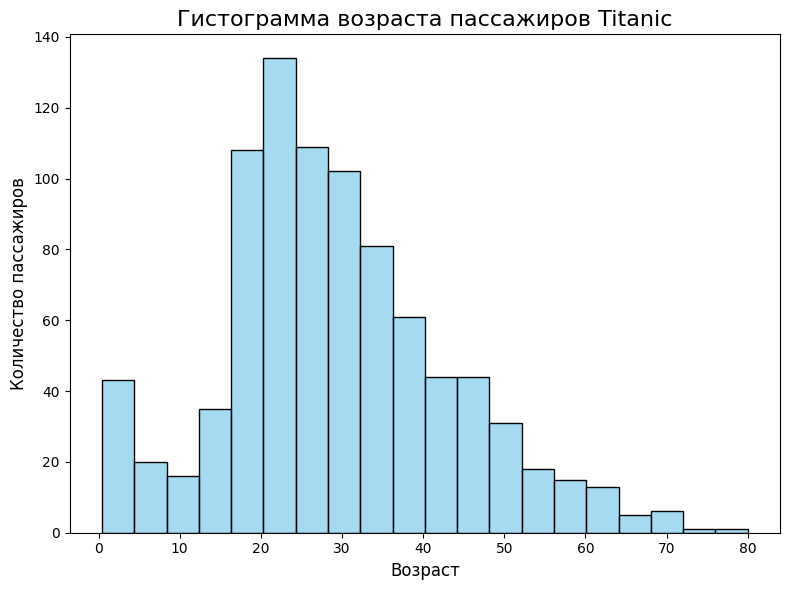

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic_data = pd.read_csv(url)

# Удаляем строки с пропущенными значениями в столбце 'Age'
titanic_data = titanic_data.dropna(subset=['Age'])

# Построение гистограммы для возраста пассажиров
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Гистограмма возраста пассажиров Titanic', fontsize=16)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.tight_layout()
plt.show()

##**Контрольные опросы**
**1. Для чего используется диаграмма рассеяния?**
Диаграмма рассеяния (или scatter plot) — это тип графика, который используется для визуализации взаимосвязи между двумя количественными переменными.

**2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?**
Гистограмма — это графическое представление распределения числовых данных. Она показывает, как данные распределены по интервалам (бинам).
+ Ось X: интервалы значений (бины).
+ Ось Y: частота (количество значений, попадающих в каждый интервал) или плотность.

Гистограммы используются для анализа распределения непрерывных данных, например, возраста, роста, дохода и т. д.

Столбчатые диаграммы используются для сравнения дискретных категорий, например, количества пассажиров в каждом классе кают.

**3. Как задать цвет линии в линейном графике Matplotlib?**
В Matplotlib цвет линии в линейном графике можно задать несколькими способами. Вот основные из них:
+ Использование параметра color
```
plt.plot(x, y, color='red') # Название цвета
plt.plot(x, y, color='#FF5733') # Шестнадцатеричный код
plt.plot(x, y, color=(0.1, 0.2, 0.5)) # Кортеж RGB (значения от 0 до 1)

```
+ Использование сокращенных обозначений
```
plt.plot(x, y, 'r--')  # Красная штрихпунктирная линия
```
+ Использование параметра c. Параметр c — это сокращение от color, и он работает так же, как и color.
```
plt.plot(x, y, c='blue')
```

**4. Чем класс plt.Figure отличается от объекта plt.Axes?**
+ *plt.Figure*
  + Figure — это контейнер, который содержит все элементы графика: оси (Axes), заголовки, легенды, подписи и т. д. Это как "холст", на котором рисуются графики.
  + Figure определяет общую область, в которой будут размещены все графические элементы. Вы можете создать несколько Figure для разных графиков.
  + Используется когда нужно настроить общие параметры графика, например, размер, фон или сохранить график в файл.

+ *plt.Axes*
  + Axes — это область внутри Figure, где непосредственно рисуются графики (линии, столбцы, точки и т. д.). Каждый Axes имеет свои оси X и Y, подписи, сетку и другие элементы.
  + Axes позволяет управлять отдельными графиками внутри Figure. Например, вы можете создать несколько Axes для отображения нескольких графиков на одном Figure
  + Используется когда нужно настроить конкретный график: добавить данные, изменить масштаб, добавить легенду и т. д.

Figure — это общий контейнер для всех графиков.

Axes — это отдельный график внутри Figure, где отображаются данные.

**5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?**
Нет, Matplotlib позволяет управлять типом маркера в графике scatter. В Matplotlib можно задавать различные формы маркеров, их размеры, цвета и другие параметры через параметр marker (например, marker='o' для круга, marker='x' для креста).

**6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?**
Нет, Matplotlib — не единственная библиотека для построения графиков в Python.
Популярные библиотеки для визуализации в Python:
+ Seaborn
+ Plotly
+ Bokeh
+ Altair
+ Pandas Visualization
+ ggplot
+ Pygal

**7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?**
Нет, Matplotlib позволяет сохранять графики в виде файлов различных форматов (например, PNG, JPEG, SVG, PDF) без необходимости делать скриншоты. Для этого используется метод savefig() объекта Figure.

**8. В наборе данных iris представлены 4 вида ирисов. Да или нет?**
Нет, в наборе данных Iris представлены не 4 вида, а 3 вида ирисов:
+ Iris setosa
+ Iris versicolor
+ Iris virginica

**9. Для всех пассажиров "Титаника" указан возраст. Да или нет?**
Нет, в наборе данных о пассажирах "Титаника" возраст указан не для всех пассажиров. В данных есть пропущенные значения (NaN) в столбце с возрастом.

**10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.**
1. Технические ограничения библиотек визуализации
Многие библиотеки (например, matplotlib, seaborn, plotly) позволяют размещать несколько диаграмм на одном холсте, но качество отображения зависит от размера каждой диаграммы и разрешения холста. Если диаграммы слишком мелкие, они становятся нечитаемыми — текст, оси, легенды сливаются.

2. Человеческое восприятие. 16 диаграмм — это условный предел, после которого человеку сложно воспринимать информацию из-за:
+ Перегруженности визуальными элементами.
+ Сложности сравнения данных между диаграммами.
+ Потери деталей из-за уменьшения размера каждой диаграммы.

3. Гибкость размеров. Размер диаграмм можно изменить (например, в matplotlib с помощью figsize, в plotly — через update_layout), но:
+ Уменьшение размера диаграмм ведёт к потере читаемости.
+ Увеличение размера холста не всегда решает проблему, так как экран пользователя или экспортируемый формат (например, PDF) имеют ограничения.